In [1]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
#savetxt('data.csv', data, delimiter=',')
# load numpy array from csv file
from numpy import loadtxt
# load array
X_train_vgg = loadtxt('X_train_prediction_VGG16.csv', delimiter=',')
# print the array
print(X_train_vgg)

[[1.45962194e-03 1.41461665e-09 9.98540401e-01 9.64855230e-15]
 [1.31064479e-03 2.86992788e-01 7.11696565e-01 2.29098540e-09]
 [1.51576591e-03 2.18369777e-07 9.98484075e-01 9.84824879e-15]
 ...
 [9.14337761e-06 2.60842086e-08 1.24964909e-05 9.99978304e-01]
 [1.18556754e-05 2.43693739e-06 9.99015128e-07 9.99984741e-01]
 [9.61103375e-09 4.83501132e-08 2.07551722e-07 9.99999762e-01]]


In [2]:
from numpy import loadtxt
# load array
X_train_zfnet = loadtxt('X_train_prediction_zfnet.csv', delimiter=',')
# print the array
print(X_train_zfnet)

[[2.48151571e-01 1.65416612e-04 7.51682580e-01 3.74640081e-07]
 [2.33636782e-01 9.88643840e-02 5.92605054e-01 7.48937503e-02]
 [7.69452900e-02 1.58777533e-04 9.22895789e-01 8.72899264e-08]
 ...
 [1.57516370e-05 1.53188303e-05 1.46343666e-06 9.99967456e-01]
 [8.46940293e-06 8.22026414e-06 6.30271643e-07 9.99982715e-01]
 [2.51856977e-06 2.50524363e-06 1.36864443e-07 9.99994874e-01]]


In [3]:
X_test_vgg = loadtxt('X_test_prediction_VGG16.csv', delimiter=',')

In [4]:
X_test_zfnet = loadtxt('X_test_prediction_zfnet.csv', delimiter=',')

In [5]:
X_test_vgg.shape

(770, 4)

In [6]:
X_test_zfnet.shape

(770, 4)

In [7]:
X_train_zfnet.shape

(3417, 4)

In [8]:
X_train_vgg.shape

(3417, 4)

In [9]:
a=X_train_vgg
b=X_train_zfnet


In [10]:
 import numpy as np
ab=(np.array(a) + np.array(b)) / 2.0

In [11]:
print(ab[0][0])

0.12480559624964371


In [12]:
ab.shape

(3417, 4)

In [13]:
print(a[0][0])

0.0014596219407394528


In [14]:
print(b[0][0])

0.24815157055854797


In [15]:
c=X_test_vgg
d=X_test_zfnet


In [16]:
cd=(np.array(c) + np.array(d)) / 2.0

In [17]:
print(c[0][0])

0.0034479049500077963


In [18]:
print(d[0][0])

0.17816010117530823


In [19]:
print(cd[0][0])

0.09080400306265801


In [20]:
cd.shape

(770, 4)

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [22]:
SIZE = 224  #Resize images

In [23]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for folder in os.listdir('train'):
    for file in os.listdir(os.path.join('train', folder)):
        if (file.endswith("JPG") or file.endswith("jpg")):
            train_labels.append(folder)
            img = cv2.imread(os.path.join('train', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            train_images.append(im)
        else:
            continue

        #Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [24]:
print('train images shape =',train_images.shape)
print('train labels shape =',train_labels.shape)

train images shape = (3417, 224, 224, 3)
train labels shape = (3417,)


In [25]:
test_images = []
test_labels = [] 

for folder in os.listdir('test'):
    for file in os.listdir(os.path.join('test', folder)):
        if (file.endswith("JPG") or file.endswith("jpg")):
            test_labels.append(folder)
            img = cv2.imread(os.path.join('test', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            test_images.append(im)
        else:
            continue


        #Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [26]:
print('test images shape =',test_images.shape)
print('test labels shape =',test_labels.shape)

test images shape = (770, 224, 224, 3)
test labels shape = (770,)


In [27]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
#it make the data calass name to numerical formate like 1,2,3,4 for calculation purpose

In [28]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [29]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [30]:
#One hot encode y values for neural network. make tahe numamic class in a matrix
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [31]:
X_train_RF, y_train_RF,X_test_RF,y_test_RF = ab, train_labels_encoded, cd, test_labels_encoded

In [32]:
#############################################################################################################################################
#RANDOM FOREST (it is classifiare problem not a regrassion problem nost use random forest regrassion) # n_estimators 50 mens it will generate 50 tree
# you can use another classifire module there like decition tree svm etc
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(n_estimators = 550, random_state = 500)
###############################################################################################################################################

In [37]:
X_train_RF.shape

(3417, 4)

In [38]:
y_train_RF.shape

(3417,)

In [33]:
# Train the model on training data
#For sklearn no one hot encoding x_for_rf random forest y_train (are level value)
RF_model.fit(X_train_RF, y_train_RF) 

RandomForestClassifier(n_estimators=550, random_state=500)

In [35]:
X_test_features = X_test_RF.reshape(X_test_RF.shape[0], -1)

In [36]:
X_test_features.shape

(770, 4)

In [39]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features) # out put will look like 1.2.3

In [40]:
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF) #before we make the class value like 1,2,3 numeric its re build this

In [41]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF)) #provide test and prediction data to measure that

Accuracy =  0.625974025974026


In [42]:
print(prediction_RF)

['Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight'
 'Blight' 'Blight' 'Common_Rust' 'Blight' 'Blight' 'Common_Rust'
 'Common_Rust' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Blight' 'Blight'
 'Blight' 'Blight' 'Gray_Leaf_Spot' 'Blight' 'Blight' 'Common_Rust'
 'Blight' 'Common_Rust' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight'
 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight'
 'Blight' 'Gray_Leaf_Spot' 'Common_Rust' 'Blight' 'Blight' 'Blight'
 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight'
 'Blight' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Blight' 'Blight'
 'Blight' 'Blight' 'Blight' 'Blight' 'Gray_Leaf_Spot' 'Common_Rust'
 'Blight' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Blight' 'Blight'
 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Blight' 'Blight'
 'Gray_Leaf_Spot' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Blight'
 'Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Blight'
 'Blight' 'Blight' 'Common_Rus

<AxesSubplot:>

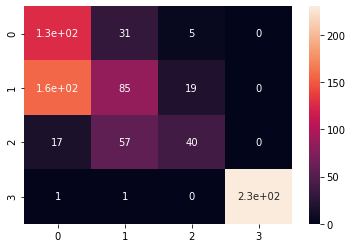

In [43]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
target_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
print("Classification Report: \n",classification_report(test_labels, prediction_RF, target_names=target_names))

Classification Report: 
                 precision    recall  f1-score   support

        Blight       0.42      0.78      0.55       163
   Common_Rust       0.49      0.33      0.39       261
Gray_Leaf_Spot       0.62      0.35      0.45       114
       Healthy       1.00      0.99      1.00       232

      accuracy                           0.63       770
     macro avg       0.63      0.61      0.60       770
  weighted avg       0.65      0.63      0.61       770



In [45]:
true = 0
false = 0
for i in range(len(prediction_RF)):
    if(prediction_RF[i]==test_labels[i]):
        true=true+1
    else:
        false=false+1
        
print('true =',true)
print('false=',false)

true = 482
false= 288
